In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
torch.device('cpu')

device(type='cpu')

In [4]:
torch.cuda.device('cuda')

In [5]:
torch.cuda.device('cuda:1')

In [6]:
torch.cuda.device_count()

1

In [7]:
x = torch.tensor([1, 2, 3])
x.device

device(type='cpu')

In [8]:
def try_gpu(i=0):
    if torch.cuda.device_count() >= i + 1:
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [9]:
x = torch.ones(2, 3,device=try_gpu())


In [10]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

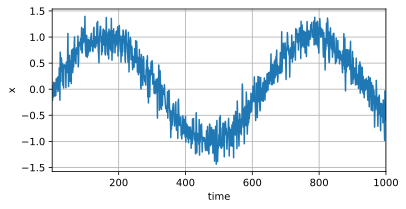

In [11]:
T = 1000
time = torch.arange(1, 1001, dtype=torch.float32)
x = torch.sin(0.01 * time)+ torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [12]:
tau = 4
features = torch.zeros((T - tau, tau))

In [15]:
for i in range(tau):
    features[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape((-1, 1))

In [18]:
batch_size, n_train = 16, 600
# 只有n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                           batch_size, is_train=True)


一个简单的模型，拥有两个全链接层的多层感知机，ReLU激活函数和平方损失

In [22]:
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                       nn.ReLU(),
                       nn.Linear(10, 1))
    net.apply(init_weight)
    return net




平方损失

In [19]:
loss = nn.MSELoss()

训练

In [30]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print("epoch {}, loss: {:f}".format(
            epoch, d2l.evaluate_loss(net, train_iter, loss)))


In [31]:
net = get_net()
train(net, train_iter, loss, epochs=10, lr=0.01)

epoch 0, loss: 0.105732
epoch 1, loss: 0.071653
epoch 2, loss: 0.063745
epoch 3, loss: 0.060673
epoch 4, loss: 0.056751
epoch 5, loss: 0.055096
epoch 6, loss: 0.058709
epoch 7, loss: 0.058079
epoch 8, loss: 0.053438
epoch 9, loss: 0.051782


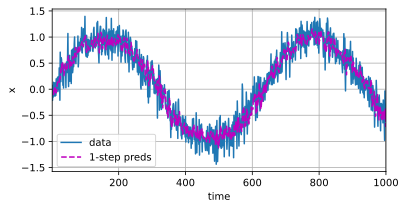

In [37]:
onestep_preds= net(features)
d2l.plot([time, time[tau:]], [x.detach().numpy(), onestep_preds.detach().numpy()],
        'time', 'x', legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))